In [53]:
words = open('names.txt', 'r').read().splitlines()

In [54]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [55]:
len(words)


32033

In [56]:
min(len(w) for w in words)


2

In [57]:
max(len(w) for w in words)

15

In [58]:
import torch

In [59]:
N = torch.zeros((27,27), dtype=torch.int32)

In [60]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
stoi

{'a': 0,
 'b': 2,
 'c': 4,
 'd': 6,
 'e': 8,
 'f': 10,
 'g': 12,
 'h': 14,
 'i': 16,
 'j': 18,
 'k': 20,
 'l': 22,
 'm': 24,
 'n': 26,
 'o': 28,
 'p': 30,
 'q': 32,
 'r': 34,
 's': 36,
 't': 38,
 'u': 40,
 'v': 42,
 'w': 44,
 'x': 46,
 'y': 48,
 'z': 50,
 '.': 0}

In [61]:
for w in words:
    chs = ['.'] + list(w)+ ['.']
    for c1, c2 in zip(chs, chs[1:]):
        ix1 = stoi[c1]
        ix2 = stoi[c2]
        N[ix1, ix2] += 1

IndexError: index 28 is out of bounds for dimension 1 with size 27

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


KeyError: 1

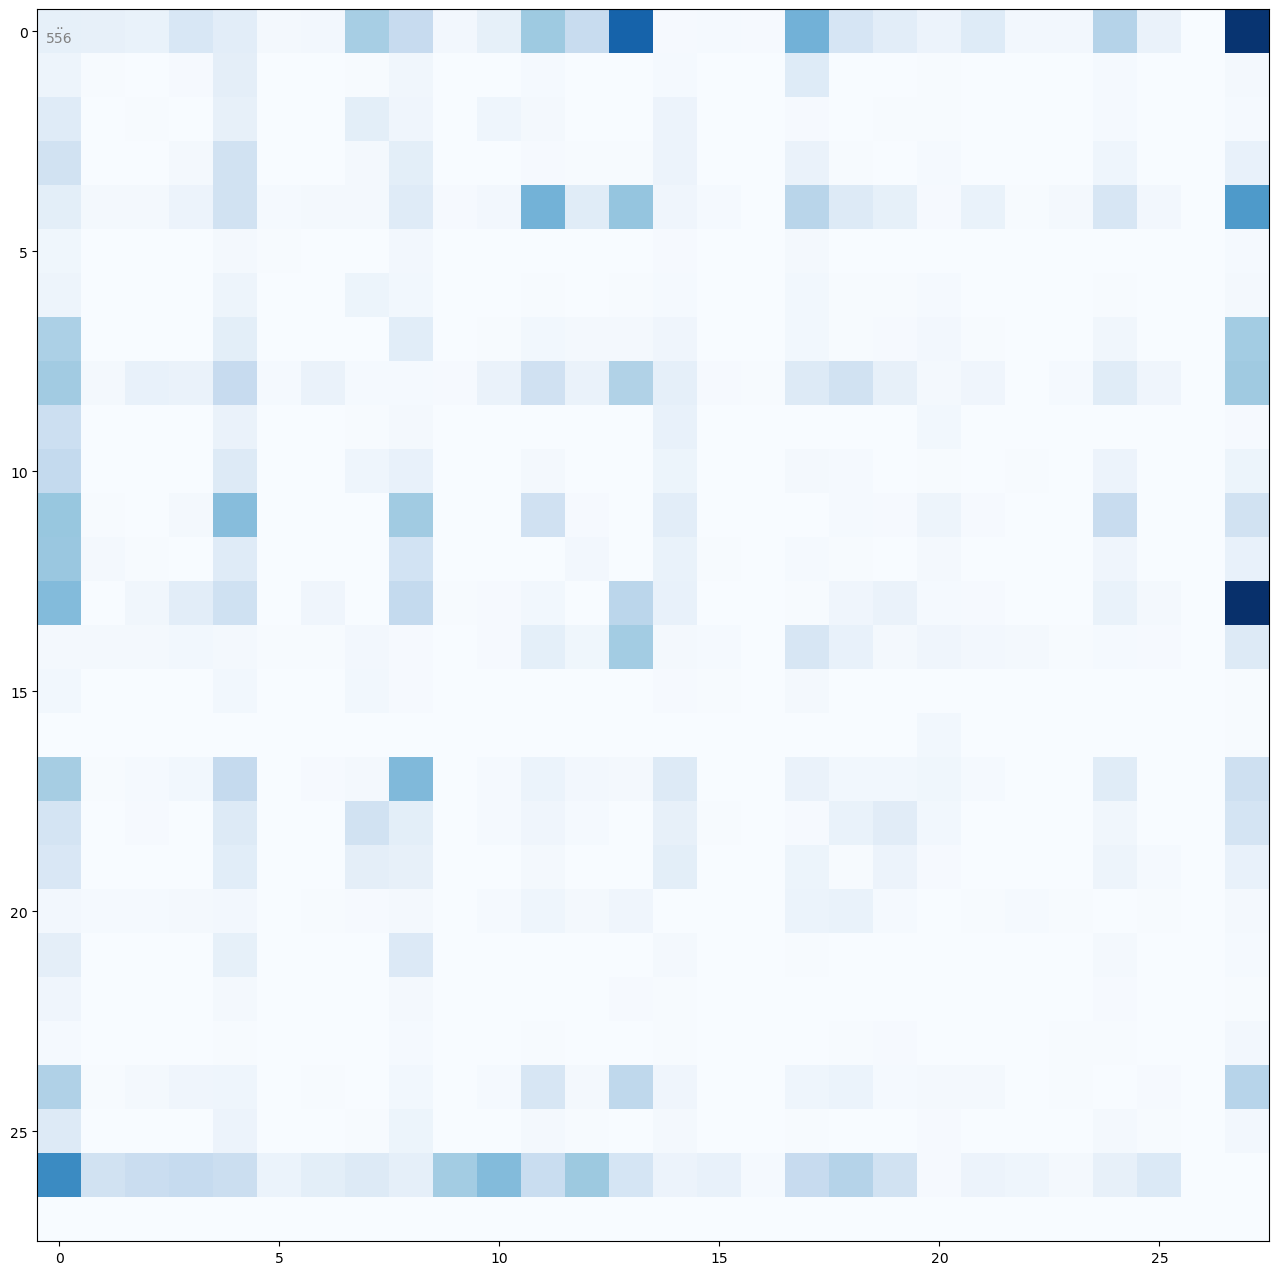

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')